# Two-way ANOVA



In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf 

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

$\def\stderr#1{\mathbf{se}_{#1}}$
$\def\stderrhat#1{\hat{\mathbf{se}}_{#1}}$
$\newcommand{\Mean}{\textbf{Mean}}$
$\newcommand{\Var}{\textbf{Var}}$
$\newcommand{\Std}{\textbf{Std}}$
$\newcommand{\Freq}{\textbf{Freq}}$
$\newcommand{\RelFreq}{\textbf{RelFreq}}$
$\newcommand{\DMeans}{\textbf{DMeans}}$
$\newcommand{\Prop}{\textbf{Prop}}$
$\newcommand{\DProps}{\textbf{DProps}}$

## Definitions

## Formulas

## Example

In [3]:
jobsatisfaction = pd.read_csv("../datasets/exercises/jobsatisfaction.csv")
jobsatisfaction.head()

,id,gender,education_level,score
0,1,male,school,5.51
1,2,male,school,5.65
2,3,male,school,5.07
3,4,male,school,5.51
4,5,male,school,5.94


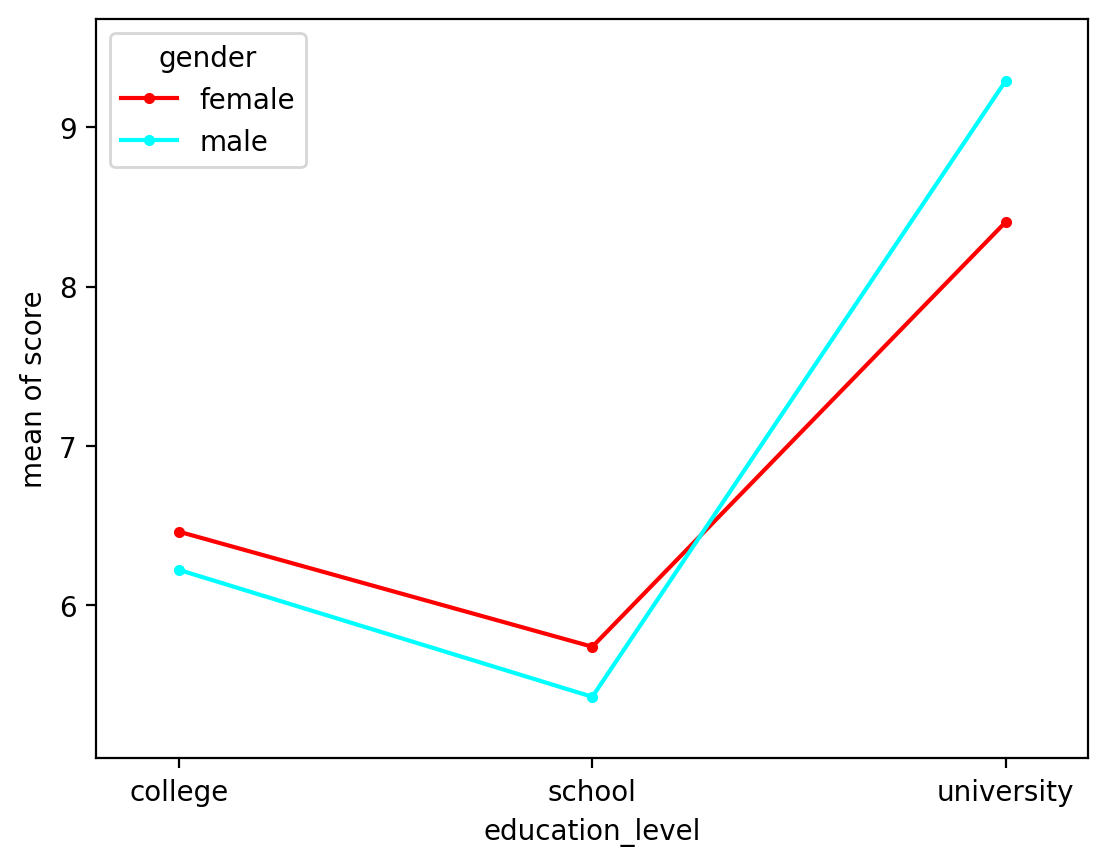

In [4]:
from statsmodels.graphics.factorplots import interaction_plot

js = jobsatisfaction
interaction_plot(js["education_level"], js["gender"], js["score"]);

In [5]:
lm_2way_anova = smf.ols("score ~ education_level*gender", data=jobsatisfaction).fit()

from statsmodels.stats.anova import anova_lm
anova_lm(lm_2way_anova, typ="II")

,sum_sq,df,F,PR(>F)
education_level,113.684117,2.0,187.892103,1.600455e-24
gender,0.225297,1.0,0.744721,3.921154e-01
education_level:gender,4.439794,2.0,7.337895,1.559245e-03
Residual,15.731300,52.0,NaN,NaN



Same results using R

```
> js = read.csv("/Users/ivan/Projects/Minireference/STATSbook/noBSstatsnotebooks/datasets/exercises/jobsatisfaction.csv")
> two_way_anova <- aov(score ~ gender*education_level, data = js)
> library(car)
> Anova(two_way_anova, type=2)
Anova Table (Type II tests)

Response: score
                        Sum Sq Df  F value    Pr(>F)    
gender                   0.225  1   0.7447  0.392115    
education_level        113.684  2 187.8921 < 2.2e-16 ***
gender:education_level   4.440  2   7.3379  0.001559 ** 
Residuals               15.731 52                       
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
```

In [6]:
import pingouin as pg
pg.anova(jobsatisfaction, dv="score", between=["gender", "education_level"], ss_type=2, detailed=True)

,Source,SS,DF,MS,F,p-unc,np2
0,gender,0.225297,1.0,0.225297,0.744721,3.921154e-01,0.014119
1,education_level,113.684117,2.0,56.842059,187.892103,1.600455e-24,0.878443
2,gender * education_level,4.439794,2.0,2.219897,7.337895,1.559245e-03,0.220107
3,Residual,15.731300,52.0,0.302525,NaN,NaN,NaN


In [7]:
# Interaction term is the same as F-test for submodel with no-interaction term
lm_noint = smf.ols("score ~ education_level + gender", data=jobsatisfaction).fit()
lm_2way_anova.compare_f_test(lm_noint)

(7.3378954880948015, 0.0015592449536140215, 2.0)

## Explanations

In [8]:
# SUM coding (requied if want to do type III ANOVA)
# lm_2way_anova_sum = smf.ols("score ~ C(education_level,Sum)*C(gender,Sum)", data=jobsatisfaction).fit()
# anova_lm(lm_2way_anova_sum, typ="III")

## Discussion


2-way ANOVA types: https://mcfromnz.wordpress.com/2011/03/02/anova-type-iiiiii-ss-explained/

Py from scratch https://www.pybloggers.com/2016/03/three-ways-to-do-a-two-way-anova-with-python/

more Py examples https://www.kaggle.com/code/alexmaszanski/two-way-anova-with-python

same data but gets different results https://rpubs.com/Corvinus/917307

https://www.statsmodels.org/dev/examples/notebooks/generated/interactions_anova.html
